# Image Classification with Flowers Dataset

Tutorial Link: https://www.tensorflow.org/tutorials/images/classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

print('TF Version', tf.__version__)
print('GPU Device:', tf.test.gpu_device_name())

TF Version 2.9.2
GPU Device: /device:GPU:0


## Download & Explore the dataset

- Dataset link: https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

- You can download the dataset by simply navigating to that link in the browser.

- Now, inorder to access the dataset programmatically, we shall use `tf.keras.utils.get_file()` method: https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file
    - This returns the "path" into which the dataset has been downloaded.

- Next, we need to use `pathlib` module to parse the directory into which the dataset is downloaded.

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

# download the dataset
dataset_dir = tf.keras.utils.get_file(fname = 'flower_photos', 
                                      origin = dataset_url,
                                      untar = True)

print(dataset_dir)

/root/.keras/datasets/flower_photos


In [3]:
# View the folder structure
!ls ~/.keras
!ls ~/.keras/datasets
!ls ~/.keras/datasets/flower_photos

datasets  keras.json
flower_photos	      test_img0  test_img2  test_img4
flower_photos.tar.gz  test_img1  test_img3
daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


Now, use `pathlib` module representing filesystem paths: https://docs.python.org/3/library/pathlib.html

In [4]:
# Parse the dataset directory
import pathlib

data_dir = pathlib.Path(dataset_dir)

print(type(data_dir))
print(data_dir)

# List the stuff inside this directory: https://docs.python.org/3/library/pathlib.html
print(type(data_dir.glob('*')))

print('\nDirectory Structure:')
for path in list(data_dir.glob('*')):
    print(path)

<class 'pathlib.PosixPath'>
/root/.keras/datasets/flower_photos
<class 'generator'>

Directory Structure:
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/daisy


In [5]:
# view the total number of images
print(len(list(data_dir.glob('*/*.jpg'))))

3670


You can use `PIL`'s `Image.open()` method to see the images from the directories.

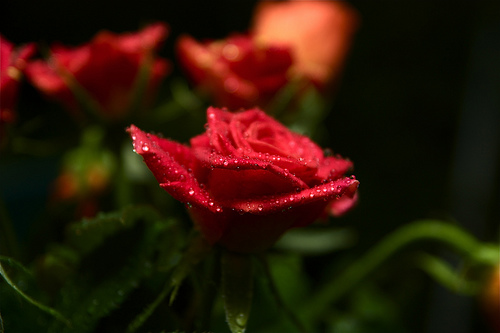

In [6]:
# Show a rose image
import PIL

# roses = list(data_dir.glob('roses/*'))
# print(roses[0])

PIL.Image.open(list(data_dir.glob('roses/*'))[9])

In [7]:
# freeing up memory
import gc
gc.collect()

22

## Load Dataset from disk & EDA

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

- Use `tf.keras.utils.image_dataset_from_directory` method to load images off the disk.

- In practice, we obtain the training set (80%) and the validation set (20%) at this step itself.

- Returns a `tf.data.Dataset` object: https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [8]:
# Parameters
img_w, img_h = 180, 180
batch_size = 32

In [9]:
# Load Training set

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 42,
    image_size = (img_h, img_w),
    batch_size = batch_size    
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
# Load Validation set

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (img_h, img_w),
    batch_size = batch_size    
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
print('Training Batches:',len(train_ds))
print('Total Training Samples:', len(train_ds) * batch_size)
print('\nValidation Batches:',len(val_ds))
print('Total Validation Samples:', len(val_ds) * batch_size)

Training Batches: 92
Total Training Samples: 2944

Validation Batches: 23
Total Validation Samples: 736


In [12]:
# Extract classnames
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 180, 180, 3) (32,)


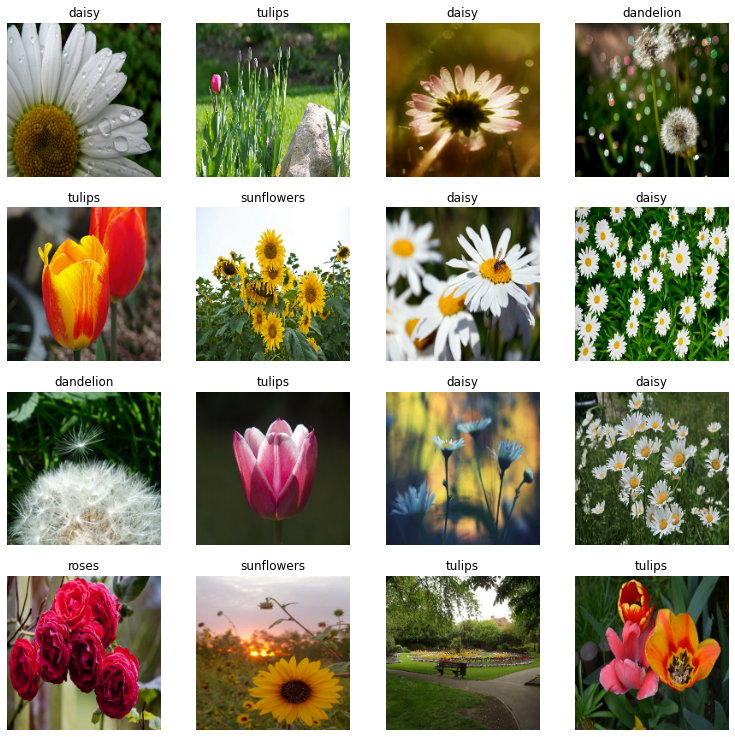

In [13]:
# Plot some samples from the training set
train_batch_1 = train_ds.take(1)
print(type(train_batch_1))

fig = plt.figure(figsize = (13, 13))

for images, labels in train_batch_1:
    print(type(images), type(labels))
    print(images.shape, labels.shape)
    # plot 16 images
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

Mapping:
0 daisy
1 dandelion
2 roses
3 sunflowers
4 tulips

Number of Training Output Labels (Samples): 2936
First 10 labels: [1, 1, 1, 3, 2, 0, 0, 3, 1, 4]

Frequency Distribution:
1    707
4    617
3    564
0    526
2    522
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


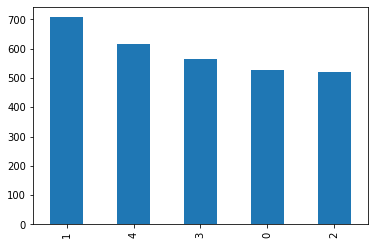

In [14]:
# Visualize the samples in each output label (class distribution) for the training dataset

# First store all the training set labels in a list
train_output_labels = []
for images_batch, labels_batch in train_ds:
    train_output_labels.extend(list(labels_batch.numpy()))

# Mapping between label number, and the label name
print('Mapping:')
for (ind, label) in enumerate(class_names):
    print(ind, label)

print('\nNumber of Training Output Labels (Samples):', len(train_output_labels))
print('First 10 labels:', train_output_labels[:10]) 
print('\nFrequency Distribution:')
print(pd.Series(train_output_labels).value_counts())

print('')
# Plot a bar graph
print(pd.Series(train_output_labels).value_counts().plot.bar())

Mapping:
0 daisy
1 dandelion
2 roses
3 sunflowers
4 tulips

Number of Validation Output Labels (Samples): 734
First 10 labels: [2, 4, 1, 2, 2, 1, 1, 4, 0, 2]

Frequency Distribution:
1    191
4    182
3    135
2    119
0    107
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


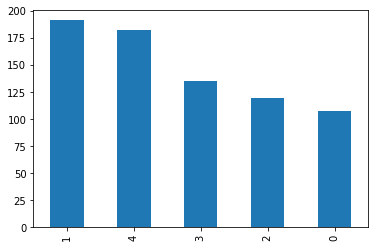

In [15]:
# Visualize the samples in each output label (class distribution) for the validation dataset

# First store all the validation set labels in a list
val_output_labels = []
for images_batch, labels_batch in val_ds:
    val_output_labels.extend(list(labels_batch.numpy()))

# Mapping between label number, and the label name
print('Mapping:')
for (ind, label) in enumerate(class_names):
    print(ind, label)

print('\nNumber of Validation Output Labels (Samples):', len(val_output_labels))
print('First 10 labels:', val_output_labels[:10]) 
print('\nFrequency Distribution:')
print(pd.Series(val_output_labels).value_counts())

print('')
# Plot a bar graph
print(pd.Series(val_output_labels).value_counts().plot.bar())

## Creating a preliminary model

- A good thing to do in Deep Learning, is to **Normalize** the input. 

- You can either do this independent of the model, or include this as a layer in the model definition. The second approach is preferred, especially when you want to simplify deployment.

- Initial Model Layout:
    - `tf.keras.layers.Rescaling` layer to normalize the input
    - Convolution Layer with 32 3*3 filters, relu activation
    - MaxPool layer with (2, 2) pool size
    - Convolution Layer with 64 3*3 filters, relu activation
    - MaxPool layer with (2, 2) pool size
    - Convolution Layer with 128 3*3 filters, relu activation
    - MaxPool layer with (2, 2) pool size
    - Convolution Layer with 256 3*3 filters, relu activation
    - MaxPool layer with (2, 2) pool size
    - Flatten layer
    - Dense layer with 256 units, relu activation
    - Dense layer with 5 units, linear activation [Output Layer]

> **NOTE:** During inference, you can use a 'Softmax' layer by building a 'probability' model separately.

In [16]:
# Define the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale = 1.0/255.0, input_shape = (img_h, img_w, 3)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = len(class_names))
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [17]:
# Define the model parameters
model_1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [18]:
epochs_cnt = 15

To train the model, since you have some validation data, use the `validation_data` parameter

In [19]:
# Train the model
history_1 = model_1.fit(
    train_ds,
    validation_data = val_ds, 
    epochs = epochs_cnt
)

Epoch 1/15
92/92 [==============================] - 13s 81ms/step - loss: 1.3686 - accuracy: 0.3787 - val_loss: 1.2479 - val_accuracy: 0.5095
Epoch 2/15
92/92 [==============================] - 7s 72ms/step - loss: 1.0265 - accuracy: 0.5794 - val_loss: 0.9338 - val_accuracy: 0.6213
Epoch 3/15
92/92 [==============================] - 7s 72ms/step - loss: 0.8767 - accuracy: 0.6454 - val_loss: 0.8750 - val_accuracy: 0.6512
Epoch 4/15
92/92 [==============================] - 7s 72ms/step - loss: 0.8015 - accuracy: 0.6890 - val_loss: 0.9324 - val_accuracy: 0.6580
Epoch 5/15
92/92 [==============================] - 7s 71ms/step - loss: 0.6688 - accuracy: 0.7473 - val_loss: 0.8482 - val_accuracy: 0.6703
Epoch 6/15
92/92 [==============================] - 7s 72ms/step - loss: 0.5538 - accuracy: 0.7858 - val_loss: 1.0007 - val_accuracy: 0.6635
Epoch 7/15
92/92 [==============================] - 8s 85ms/step - loss: 0.4400 - accuracy: 0.8273 - val_loss: 1.1117 - val_accuracy: 0.6662
Epoch 8/15
9

## Visualize the training & validation results for the preliminary model

The model we built has a clear sign of overfitting, lets visualize it.
Plot a graph, using the history you just stored

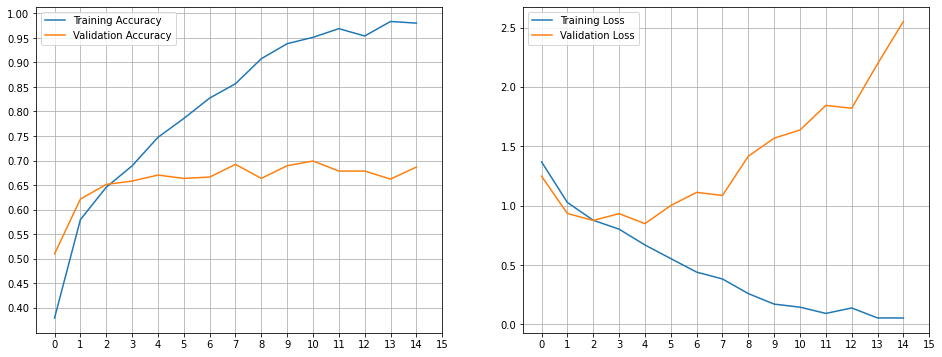

In [20]:
# Visualize Overfitting

# Get the accuracies & losses from the model history
train_accuracy_1 = history_1.history['accuracy']
train_loss_1 = history_1.history['loss']
val_accuracy_1 = history_1.history['val_accuracy']
val_loss_1 = history_1.history['val_loss']

_ = plt.figure(figsize = (16, 6))

# Plot between Training & Val Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_1, label = 'Training Accuracy')
plt.plot(val_accuracy_1, label = 'Validation Accuracy')
plt.xticks(np.arange(0, epochs_cnt + 1, 1))
plt.yticks(np.arange(0.4, 1 + 0.05, 0.05))
plt.legend()
plt.grid()

# Plot between Train & Val Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_1, label = 'Training Loss')
plt.plot(val_loss_1, label = 'Validation Loss')
plt.xticks(np.arange(0, epochs_cnt + 1, 1))
plt.legend()
plt.grid()

plt.show()

There is a clear sign of 'Overfitting', look at the gap the preliminary model has between the training set accuracy and the validation set accuracy.

&rarr; When there are small number of training samples, the model learns some unwanted details of the training set to an extent that it negatively affects the performance of the model on new unseen data. In other words, the model will fail to generalize well for new inputs.

&rarr; To prevent overfitting, lets use two techniques (there are other ways)
- Data Augmentation
- Dropout Regularization

> **NOTE:** Both Data Augmentation & Dropout layers are inactive during inference time.

## Data Augmentation

- Generates additional training data from the existing ones, by augmenting a sample using random transformations such as flips, zoom, etc.

- This generates more aspects & scenarios for the data.

- Lets make use of 3 Data Augmentation methods:
    - Random Flip
    - Random Rotation
    - Random Zoom

- We can implement data augmentation using the TF's Keras' API, for that, we need a new set of preprocessing layers.

In [21]:
# Define a set of data augmentation layers
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode = 'horizontal', input_shape = (img_h, img_w, 3)),
    tf.keras.layers.RandomRotation(factor = 0.15),
    tf.keras.layers.RandomZoom(height_factor = 0.15)
])

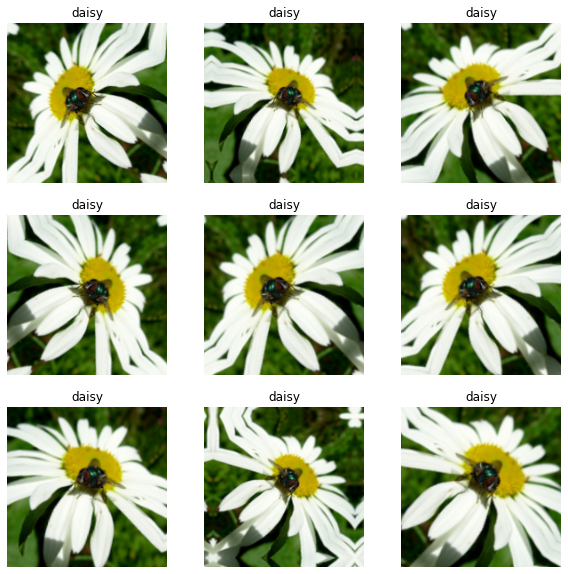

In [22]:
# Visualize a few augmented examples by applying data augmentation to the same image several times
_ = plt.figure(figsize = (10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation_layers(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.title(class_names[list(labels.numpy())[0]])
        plt.axis('off')

## Dropout Regularization

- During training, if you apply Dropout to a layer, it randomly drops a few neurons outputs from propagating forward. The `rate` parameter in `tf.keras.layers.Dropout` layer does this.

- Now, combining the data augmentation layers & the dropout regularization, create a new model.

In [23]:
# Define a second model
model_2 = tf.keras.Sequential([
    # Data Augmentation layers
    data_augmentation_layers,
    # CNN layers
    tf.keras.layers.Rescaling(scale = 1.0/255.0),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    # Dropout Regularization
    tf.keras.layers.Dropout(rate = 0.125),
    # Fully Connected network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = len(class_names))
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

In [24]:
# Define the model parameters
model_2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [25]:
# Train the model
history_2 = model_2.fit(
    train_ds,
    validation_data = val_ds, 
    epochs = epochs_cnt
)

Epoch 1/15
92/92 [==============================] - 10s 93ms/step - loss: 1.3194 - accuracy: 0.4118 - val_loss: 1.1862 - val_accuracy: 0.5163
Epoch 2/15
92/92 [==============================] - 9s 90ms/step - loss: 1.0501 - accuracy: 0.5681 - val_loss: 0.9620 - val_accuracy: 0.6362
Epoch 3/15
92/92 [==============================] - 9s 90ms/step - loss: 0.9382 - accuracy: 0.6230 - val_loss: 1.0245 - val_accuracy: 0.6049
Epoch 4/15
92/92 [==============================] - 9s 90ms/step - loss: 0.8858 - accuracy: 0.6512 - val_loss: 0.9647 - val_accuracy: 0.6281
Epoch 5/15
92/92 [==============================] - 8s 88ms/step - loss: 0.8368 - accuracy: 0.6740 - val_loss: 1.0177 - val_accuracy: 0.6553
Epoch 6/15
92/92 [==============================] - 11s 112ms/step - loss: 0.7791 - accuracy: 0.6945 - val_loss: 0.8945 - val_accuracy: 0.6757
Epoch 7/15
92/92 [==============================] - 9s 91ms/step - loss: 0.7894 - accuracy: 0.6907 - val_loss: 0.7884 - val_accuracy: 0.7003
Epoch 8/15

## Visualize the performance for the new model

This model which included Data Augmentation & Dropout layer, has a training accuracy of ~77% and a validation accuracy of ~75%, which is a good sign of generalization (though not the best)

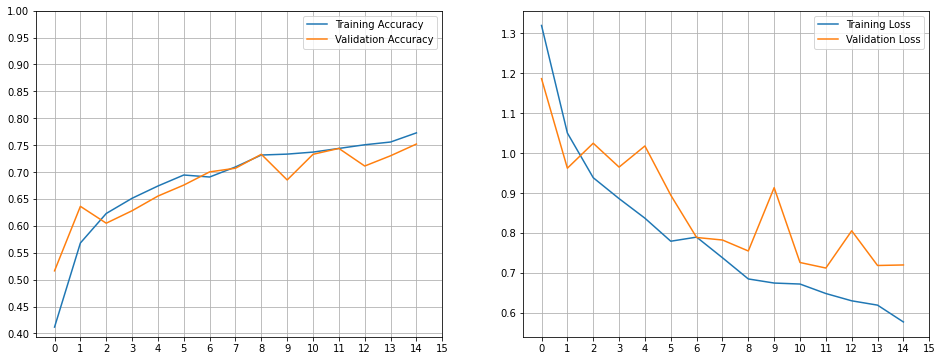

In [26]:
train_accuracy_2 = history_2.history['accuracy']
train_loss_2 = history_2.history['loss']
val_accuracy_2 = history_2.history['val_accuracy']
val_loss_2 = history_2.history['val_loss']

_ = plt.figure(figsize = (16, 6))

# Plot between Training & Val Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_2, label = 'Training Accuracy')
plt.plot(val_accuracy_2, label = 'Validation Accuracy')
plt.xticks(np.arange(0, epochs_cnt + 1, 1))
plt.yticks(np.arange(0.4, 1 + 0.05, 0.05))
plt.legend()
plt.grid()

# Plot between Train & Val Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_2, label = 'Training Loss')
plt.plot(val_loss_2, label = 'Validation Loss')
plt.xticks(np.arange(0, epochs_cnt + 1, 1))
plt.legend()
plt.grid()

plt.show()

That was a much better curve.
Our model is able to able well (not too well, but just fine).

## Predicting Results for New Inputs (Inference)

- Our model has a linear activation in the output layer.

- We need to use a Softmax layer to get the probability that this image belongs to this class at this percentage of confidence.

- First, lets load some images from their Web URLs.

In [27]:
image_urls = [
    'https://images.unsplash.com/photo-1560717789-0ac7c58ac90a?auto=format&fit=crop&w=180&h=180&q=100',    # Daisy 
    'https://images.unsplash.com/photo-1589775694940-5780fbfb6df4?auto=format&fit=crop&w=180&h=180&q=100', # Dandelion
    'https://images.unsplash.com/photo-1496062031456-07b8f162a322?auto=format&fit=crop&w=180&h=180&q=100', # Rose
    'https://images.unsplash.com/photo-1597848212624-a19eb35e2651?auto=format&fit=crop&w=180&h=180&q=100', # Sunflower
    'https://images.unsplash.com/photo-1586968295564-92fd7572718b?auto=format&fit=crop&w=180&h=180&q=100'  # Tulip
]

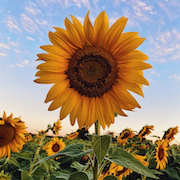

In [28]:
# Show a sample image
from PIL import Image
import requests

Image.open(requests.get(image_urls[3], stream=True).raw)

0 https://images.unsplash.com/photo-1560717789-0ac7c58ac90a?auto=format&fit=crop&w=180&h=180&q=100
1 https://images.unsplash.com/photo-1589775694940-5780fbfb6df4?auto=format&fit=crop&w=180&h=180&q=100
2 https://images.unsplash.com/photo-1496062031456-07b8f162a322?auto=format&fit=crop&w=180&h=180&q=100
3 https://images.unsplash.com/photo-1597848212624-a19eb35e2651?auto=format&fit=crop&w=180&h=180&q=100
4 https://images.unsplash.com/photo-1586968295564-92fd7572718b?auto=format&fit=crop&w=180&h=180&q=100
(5, 180, 180, 3)


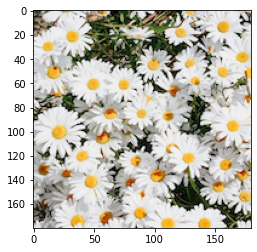

In [29]:
# Create the matrix representations
images_arr = []

for ind, img_url in enumerate(image_urls):
    print(ind, img_url)
    path = tf.keras.utils.get_file(f'test_img{ind}', origin = img_url)
    img = tf.keras.utils.load_img(
        path, target_size=(img_h, img_w)
    )
    img_array = tf.keras.utils.img_to_array(img)
    images_arr.append(img_array)   

images_arr = np.array(images_arr, dtype='uint8') # dtype is important

print(images_arr.shape)

plt.imshow(images_arr[0])

1/1 [==============================] - 0s 200ms/step


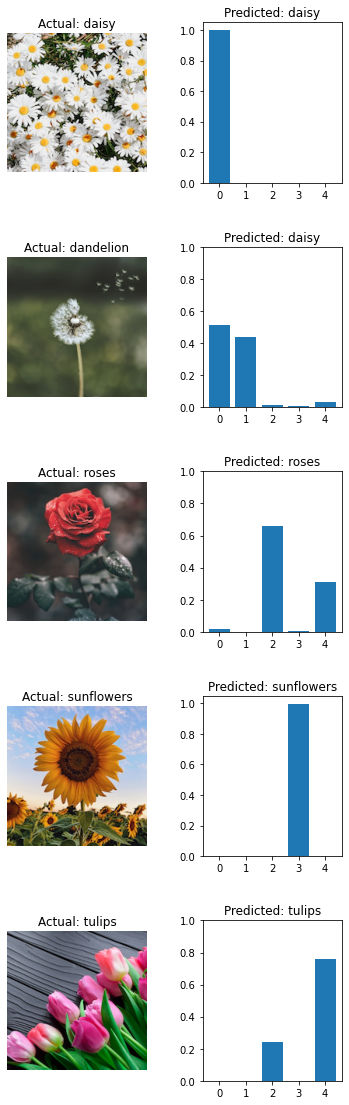

In [30]:
# Get Predictions from the model & Visualize them

true_labels = [0, 1, 2, 3, 4] # y_true for the new samples

predictions = model_2.predict(images_arr)

_ = plt.figure(figsize = (6, 15))
plt_index = 1

for ind, pred in enumerate(predictions):
    probabilities = tf.nn.softmax(pred)
    pred_label = np.argmax(probabilities)

    # Plot the sample & the true label
    plt.subplot(5, 2, plt_index)
    plt.imshow(images_arr[ind])
    plt.title(f'Actual: {class_names[ind]}')
    plt.axis('off')

    # Plot the prediction probabilities as a bar graph
    plt.subplot(5, 2, plt_index + 1)
    plt.bar(true_labels, probabilities)
    plt.xticks(np.arange(0, len(class_names)))
    plt.yticks(np.arange(0, 1.0 + 0.2, 0.2))
    plt.title(f'Predicted: {class_names[pred_label]}')

    plt_index += 2

    # print(f'Actual: {class_names[ind]}')
    # print(f'Predicted: {class_names[pred_label]}')
    # print(f'Confidence: {np.max(probabilities)}')
    # if ind != len(true_labels) - 1:
    #     print('------')

plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.4, wspace = 0.4)

Well, the dandelion is somehow being predicted as daisy. Actually, for different model training runs, the output keeps changing between daisy & dandelion.

Nevertheless, the model did fine.